# 7 非线性模型

## 7.1 多项式回归

为了体现响应变量和预测变量之间的非线性关系，将线性模型推广最自然的方法是将标准线性模型
$$ y_i = \beta_0+\beta_1 x_i+\epsilon_i $$
换成一个多项式函数
$$ y_i = \beta_0+\beta_1 x_i+\beta_2 x^2_i+\beta_3 x^3_i+\ldots+\beta_d x^d_i+\epsilon_i\tag{7.1} $$
这种方法称为多项式回归。对于阶数比较大的 d , 多项式回归将呈现明显的非线性曲线。总之, 对多项式阶数 d 的选择不宜过大，一般不大于 3 或者 4 ，这是因为 d 越大，多项式曲线就会越光滑甚至会在 X 变量最定义域的边界处呈现异样的形状。

In [35]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # 作图包

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from patsy import dmatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [31]:
# 读取数据
df = pd.read_csv('Wage.csv')
df.head(5)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [43]:
X = PolynomialFeatures(4).fit_transform(df.age.values.reshape(-1,1)) #构造age的4次多项式 [age^0,age^1,age^2,age^3,age^4]
y = (df.wage > 250).map({False:0, True:1}).values   #构造关于wage的0，1二分类变量

fit1 = sm.GLM(y, X, family=sm.families.Binomial(sm.families.links.logit)).fit() #逻辑回归
print(fit1.summary())

age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)  #生成起点为18，终点为79，步长为1的排列
X_test1 = PolynomialFeatures(4).fit_transform(age_grid)  #构造age_grid的4次多项式
pred1 = fit1.predict(X_test1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.61
Date:                Sat, 20 Nov 2021   Deviance:                       701.22
Time:                        21:43:11   Pearson chi2:                 3.70e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -109.5530     47.655     -2.299      0.0

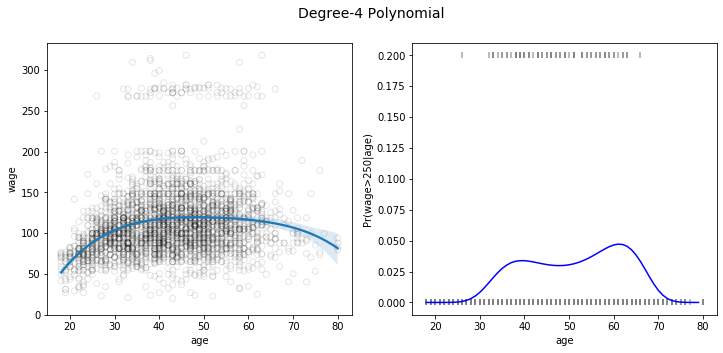

In [38]:
# 绘制图像
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))  #搭建框架，确定输出1行x2列的图象，图片尺寸为12x5英寸
fig.suptitle('Degree-4 Polynomial', fontsize=14)     #设置图标题和字体大小  

# 绘制多项式回归的散点图
ax1.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
sns.regplot(df.age, df.wage, order = 4, truncate=True, scatter=False, ax=ax1)
ax1.set_ylim(ymin=0)     #设置y轴的范围

# Logistic 回归
ax2.plot(age_grid, pred1, color='b')

#  显示训练数据中工资>250 的分布图
# 'True' 在上方, 'False' 在下方
ax2.scatter(df.age, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)');

图 7 -1 的左图是 Wage 数据集中的 wage 变量关于 age 变量的散点图，其中包含了居住在美国亚特兰大中部地区男性的收入和人口信息。 图中蓝色实线是使用最小二乘法拟合的四阶多项式回归的结果。

从图 7-1 中可以看出，工资好像是来由于两个不同的总体.一个总体是年收入高于250000 美元的高收入组，而另一个则是低收入组。把wage看做一个二元变量就能将数据分成两个组。这样以 age 的多项式函数作为预测变量的Logistic回归就能用来预测这个二元响应变量。
换句话说，实际上需要拟和的是下面这个模理
$$Pr(y_i>250|x_i)=\frac{exp(\beta_0+\beta_1 x_i +\beta_2 x^2_i +\ldots +\beta_d x^d_i)}{1+exp(\beta_0+\beta_1 x_i +\beta_2 x^2_i +\ldots +\beta_d x^d_i)}\tag{7.3} $$
图 7-1 的右半部分展示的就是这个结果。图 7-1右图的上部和下部的灰色部分分别对应高收人人群和低收入人群。蓝色的实线表示高收入人群的拟合概率值，它是关于 age 的函数。 

## 7.2  阶梯函数

在线性模型中使用特征变量的多项式形式作为预测变量得到了在 $X$ 取值空间全局皆非线性的拟合函数。如果不希望得到全局的模型，可以使用阶梯函数拟合。

这里，把 X 的取值范围分成一些区间，每个区间拟和一个不同的常数。这相当于将一个连续变盘转换成一个有序的分类变量。

更具体些讲，首先在 $X$ 取值空间上创建分割点$c_1, c_2, \ldots, c_K$ , 然后构造$K + 1$ 个新变量如下:
$$
\begin{align}
C_0(X) &= I(X<c_1) \\
C_1(X) &= I(c_1\le X<c_2) \\
C_2(X) &= I(c_2\le X<c_3) \\
\vdots \\
C_{K-1}(X) &= I(c_{K-1}\le X<c_K) \\
C_K(X) &= I(c_K\le X)
\end{align}\tag{7.4}
$$
其中 $I(·)$ 是指示函数。当条件成立时返回 1 否则返回 0。这样定义的变量有时候也称为虚拟变量。
于是对任意 $X$ 的取值， $C_0(X)+C_1(X)+\ldots+C_K(X)=1$, 以 $C_1(X), C_2(X),\ldots,C_K(X)$ 为预测变量用最小二乘法来拟合线性模型:
$$y_i=\beta_0+\beta_1 C_1(x_i)+\beta_2 C_2(x_i)+\ldots+\beta_K C_K(x_i)+\epsilon_i \tag{7.5}$$

In [39]:
# 把数据分成4个连续的区间
df_cut, bins = pd.cut(df.age, 4, retbins=True, right=True) #数据离散化处理，等宽分箱
df_cut.value_counts(sort=False)

(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: age, dtype: int64

In [7]:
df_steps = pd.concat([df.age, df_cut, df.wage], keys=['age','age_cuts','wage'], axis=1) #纵向合并
df_steps.head(5)

,age,age_cuts,wage
0,18,"(17.938, 33.5]",75.043154
1,24,"(17.938, 33.5]",70.476020
2,45,"(33.5, 49.0]",130.982177
3,43,"(33.5, 49.0]",154.685293
4,50,"(49.0, 64.5]",75.043154


In [8]:
#为年龄组创建虚拟变量
df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])

#Statsmodels 需要显示添加常量
df_steps_dummies = sm.add_constant(df_steps_dummies) #添加一个截距列
df_steps_dummies.head(5)

,const,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
0,1.0,1,0,0,0
1,1.0,1,0,0,0
2,1.0,0,1,0,0
3,1.0,0,1,0,0
4,1.0,0,0,1,0


In [42]:
fit2 = sm.GLM(df_steps.wage, df_steps_dummies.drop(df_steps_dummies.columns[[1]], axis=1)).fit()
fit2.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,94.1584,1.476,63.790,0.000,91.265,97.051
"(33.5, 49.0]",24.0535,1.829,13.148,0.000,20.468,27.639
"(49.0, 64.5]",23.6646,2.068,11.443,0.000,19.611,27.718
"(64.5, 80.0]",7.6406,4.987,1.532,0.126,-2.135,17.416


In [54]:
# 将测试数据与训练数据放在相同的 bin 中
bin_mapping = np.digitize(age_grid.ravel(), bins)   #ravel()扁平化操作
#进行两层for循环，bins列表是升序的，那么如果满足 bins[i-1]<=age_grid<bins[i],那么就保存i，然后回到外层循环继续上面的操作
#返回由i组成的来源于bins的索引的一个索引列表。

# 获取虚拟变量，删除第一个虚拟变量并添加常量
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis=1))  #删掉第一列 axis=0代表往跨行(down)，而axis=1代表跨列(across)

pred2 = fit2.predict(X_test2)

# 拟合广义线性模型
fit3 = sm.GLM(y, df_steps_dummies.drop(df_steps_dummies.columns[[1]], axis=1),
              family=sm.families.Binomial(sm.families.links.logit)).fit()

pred3 = fit3.predict(X_test2)

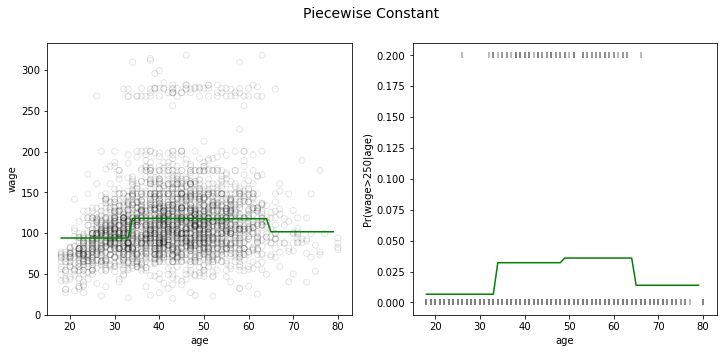

In [20]:
# 绘图
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# 绘制多项式回归的散点图
ax1.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
ax1.plot(age_grid, pred2, c='g')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(ymin=0)

# # Logistic 回归
ax2.plot(np.arange(df.age.min(), df.age.max()).reshape(-1,1), pred3, color='g')

#  显示训练数据中工资>250 的分布图
# 'True' 在上方, 'False' 在下方
ax2.scatter(df.age, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)');

图 7-2 左图是以图 7-1 中的 Wage 数据拟合阶梯函数的效果。用 wage 对 age 拟合logistic 回归如下:
$$
Pr(y_i>250|x_i)=\frac{exp(\beta_0+\beta_1 C_1(x_i)+\ldots+\beta_KC_K(x_i))}{1+exp(\beta_0+\beta_1 C_1(x_i)+\ldots+\beta_KC_K(x_i))}\tag{7.6}
$$
并用该模型预测一个人是高收入者的概率。图 7-2 的右图显示使用这种方法得到的拟合后验概率。

遗憾的是，如果预测变量本身不具有明显的分割点，那么用分段固定值拟和就不十分恰当。例如，图7-2 的左侧，在第一区间内 wage 随 age 本来应有的增长趋势没有得到体现。

## 7.3 基函数

多项式和阶梯函数回归模型实际上是特殊的基函数方法。基本原理是对变量 $X$ 的函数或变换: $b_1(X), b_2(X), \ldots, b_K(X)$ 进行建模。以模型

$$
y_i = \beta_0+\beta_1 b_1(x_i)+\beta_2 b_2(x_i)+\beta_3 b_3(x_i)+\ldots+\beta_K b_K(x_i)+\epsilon_i\tag{7.7}
$$

来替代线性模型。注意基函数 $b_1(·), b_2(·),\ldots,b_K(·)$ 的值是给定的而且是已知的。 对于多项式回归来说，基函数就是 $b_j(x_i)=x^j_i$, 而对于阶梯函数其基函数则为 $b_j(x_i)=I(c_j\le x_j<c_{j+1})$。我们可以认为式(7.7) 就是以 $b_1(x_i), b_2(x_i),\ldots,b_K(x_i)$为预测变量的标准线性模型。 因此，可以使用最小二乘法来估计式 (7.7) 中未知的回归系数。重要的是，这还表示第 3 章所讨论的有关线性模型的各种推断结果，如标准误、系数估计值和用于模型整体显著性检验的 F 统计量都可以用。

## 7.4 回归样条

### 7.4.1分段多项式
分段多项式回归在 $X$ 的不同区域拟合独立的低阶多项式函数，以此取代在 $X$ 全部取值范围内拟合高阶多项式。例如，分段三次多项式函数在 $X$ 的不同区域拟合形式如下的模型:
$$
y_i = \beta_0+\beta_1 x_i +\beta_2 x^2_i +\beta_3 x^3_i +\epsilon_i \tag{7.8}
$$
其中不同区城内的系数 $\beta_0, \beta_1, \beta_2,\beta_3 $都不相同。系数发生变化的临界点称为结点( knot) 。

例如，无结点的分段三次多项式就是 (7. 1) 式中当$d = 3$时的标准三次多项式。只有一个
结点 c 的分段三次多项式具有如下形式：
$$
y_i = \begin{cases}
\beta_{01} + \beta_{11} x_i +\beta_{21} x^2_i +\beta_{31} x^3_i +\epsilon_i,\; if x_i<c, \\
\beta_{02} + \beta_{12} x_i +\beta_{22} x^2_i +\beta_{32} x^3_i +\epsilon_i,\; if x_i\ge c.
\end{cases}
$$

图 7-3 左上角的这张图显示了使用分段三次多项式且只有一个结点 age =50 的函数来拟合 Wage 数据的结果。图中的问题非常明显：该函数是不连续的且看起来很滑稽！由于每个多项式有四个参数，所以总共使用了 8 个自由度构建这个分段多项式模型。
![7.3](img/7.3.png)

### 7.4.2 约束条件与样条
图 7-3 左上角的图看起来并未得到正确的拟合，这是因为拟合曲线太光滑了。为了修正这个问题，需要添加确保拟合曲线是连续的约束条件来拟合分段多项式。换句话说，在 age = 50是不能有跳跃的。图 7-3 的右上角图显示出所得到的拟合结果。这张图看起来比左上角的图好一些。但 V 形拟合的连接仍然看起来不自然。

左下角的图添加了两个额外的限制:现在分段多项式在 age = 50 的一阶导数和二阶导数都是连续的。换句话说，左下角图要求分段多项式不仅在 age = 50 处是连续的而且是光滑的。每个对分段三次多项式施加的约束都有效地释放了一个自由度，减少了模型的始复杂性

综上所述，左上角的图使用的是 8 个自由度。而左下角图施加了三个约束(连续性，一阶导数的连续性，二阶导数的连自主性) ，这样就只有 5 个自由度。左下角的周形通常称为三次样条。在一般情况下，与 K 个结点一同使用的三次样条会产生 4+K 个自由度。

在图 7-3 中，右下角图是线性样条，它在 age = 50 处连续。 d 阶样条的一般定且是分段 d
阶多项式，同时在每个结点直到 d-1 阶导数都是连续的。

### 7.4.3 样条基函数
前一节中所述的回归样条略显复杂，保证多项式自身或者它的前 $d -1$ 阶导数是连续的条件下来拟合 $d$ 阶分段多项式函数有的时候并不轻松。实际上，使用式 (7.7) 中的基函数模型来表示回归样条，并通过选择合适的基函数$ b_1,b_2,... b_{K+3}$，一个有 $K$ 个结点的三次样条函数可以表示成如下形式:
$$
y_i = \beta_0 + \beta_1b_1(x_i)+\beta_2b_2(x_i)+\cdots+\beta_{K+3}b_{K+3}(x_i)+\epsilon_i\tag{7.9}
$$

正如可以有许多方式来表示多项式一样，在式 (7.9) 中也可以选择不同的基函数得到等价的三次样条。最直接的表示式 (7.9) 中三次样条的方法是先以三次多项式的基为基础，即 $x, x^2. x^3$，然后在每个结点添加一个截断幂基函数。截断幂基函数可
以定义为
$$
h(x,\xi)=(x-\xi)^3_+ = \begin{cases}
(x-\xi)^3  \; if x>\xi\\
0  \; otherwise,
\end{cases}\tag{7.10}
$$

其中 $\xi$ 是结点。可以证明在式 (7.8) 添加一项$\beta_4h(x, \xi)$ 只会使得三次多项式在  $\xi$处的三阶导数不连续;而在每个结点，函数本身、一阶导数、二阶导数都是连续的。


遗憾的是，样条在预测变量之外的区域，也就是当 $X$ 取较大值或较小值时，有较大的方差。因 7-4 是有三个结点的 Wage 数据的拟告图。从图中看到，在边界区域出现的置信带相当宽。自然样条(natural spline) 是附加了边界约束的回归样条:函数在边界区域应该是线性的，这里的边界区域指的是 $X$ 的值比最小的结点处的值小或比最大的结点处的值大。这个附加的约束条件使得自然样条的估计在边界处更稳定。图 7-4 中的红线显示了一个自然三次样条。值得注意的是，红线的置信区间更窄。
![7.4](img/7.4.png)

###  7.4.4 确定结点的个数和位置
在拟合样条时一个自然的问题是:结点应该选在什么位置呢?对于回归样条来说，由于在包含许多结点的区域多项式的系数跌宕起伏，这时回归样条非常曲折。这就需要在选择多个结点但会引起曲线急速变化和选择较少的结点令函数变得更平稳之间做出权衡。

实践证明，令结点在数据上呈现均匀分布是一种比较有效的结点选择方式。这种方法的一种实现方式是:首先确定需要的自由度，然后依靠软件自动在数据的均匀分位数点上设置相应个数的结点。

In [48]:
# 在25、40和60三个节点生成三次样条
transformed_3knots = dmatrix("bs(df.age, knots=(25,40,60), degree=3, include_intercept=False)",
                         {"df.age": df.age}, return_type='dataframe')  #无截距
spln_3knots = sm.GLM(df.wage, transformed_3knots).fit()
pred_3knots = spln_3knots.predict(dmatrix("bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)",
                                          {"age_grid": age_grid}, return_type='dataframe'))

In [52]:
#生成4节三次样条曲线
transformed_deg4 = dmatrix("cr(df.age, df=4)", {"df.age": df.age}, return_type='dataframe')

# 在分区的数据集上拟合广义线性模型
fit4 = sm.GLM(df.wage, transformed_deg4).fit()
# 预测
pred4 = fit4.predict(dmatrix("cr(age_grid, df=4)", {"age_grid": age_grid}, return_type='dataframe'))

# 在分区的数据集上拟合广义线性模型
fit5 = sm.GLM(y, transformed_deg4, family=sm.families.Binomial(sm.families.links.logit)).fit()
# 预测
pred5 = fit5.predict(dmatrix("cr(age_grid, df=4)", {"age_grid": age_grid}, return_type='dataframe'))

(0, 350)

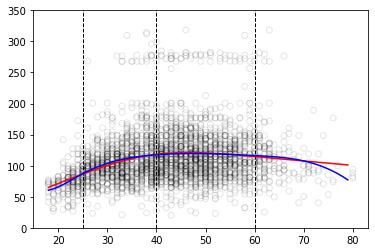

In [51]:
# 绘制样条曲线
plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(age_grid, pred4, color='r')
plt.plot(age_grid, pred_3knots, color='b')
[plt.vlines(i , 0, 350, linestyles='dashed', lw=1, colors='k') for i in [25,40,60]]
plt.ylim(0,350)

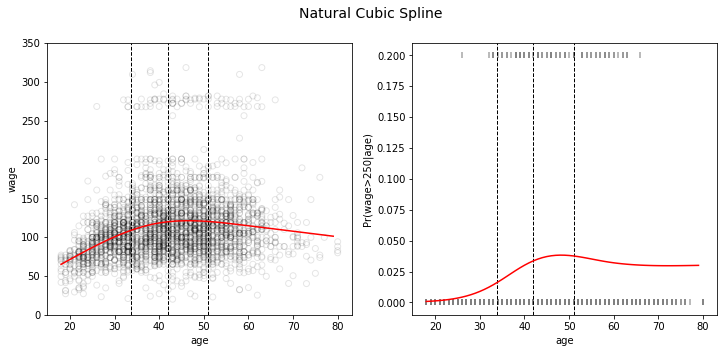

In [14]:
# 绘制图像
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Natural Cubic Spline', fontsize=14)

# 绘制多项式回归的散点图
ax1.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
ax1.plot(age_grid, pred4, color='r')
[ax1.vlines(i , 0, 350, linestyles='dashed', lw=1, colors='k') for i in [33.75,42,51]]

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(0,350)

# Logistic 回归
ax2.plot(np.arange(df.age.min(), df.age.max()).reshape(-1,1), pred5, color='r')
[ax2.vlines(i , -0.01, 0.21, linestyles='dashed', lw=1, colors='k') for i in [33.75,42,51]]

#  显示训练数据中工资>250 的分布图
# 'True' 在上方, 'False' 在下方
ax2.scatter(df.age, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)');


图 7-5 是以 Wage 数据作为例子的拟合结果。与图 7-4 中一样，图中拟合了带三个结点的自然三次样条函数，只是这一次模型自动地选择了 25% ， 50%. 75% 分位数作为结点的位置。三个结点是自由度 4 来确定的。

需要使用几个结点呢，或者说样条函数的自由度选定在多少呢?一种方法是尝试多个不
同的结点个数，然后从中选择拟合的"形状最理想"的曲线。另一种较为客观的方法是使
用在第 5 章和第 6章讨论过的交叉验证方法。使用交叉验证时，首先移除一部分数据(比如说10%) ，然后用其余的数据来拟合样条函数，接着用拟合得到的样条函数来对移除的那一部分数据做预测。这样不断重复多次直到所有的数据都被移除过一次，最后计算整体的交叉验证 $RSS$。整个步骤对不同的结点数目$K$不断重复。选择$RSS$最小的样条函数对应的 $K$  
![7.6](img/7.6.png)

<Figure size 864x432 with 0 Axes>

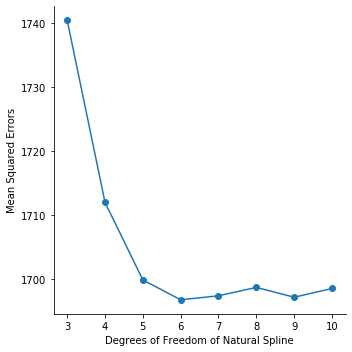

In [55]:
Degrees = np.arange(3,11)
errors = []
for i in Degrees:
    fun = 'cr(df.age, df='+str(i)+')'
    X = dmatrix(fun, {"df.age": df.age}, return_type='dataframe')
    y = df.wage
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)
    
    spln = sm.GLM(y_train, X_train).fit()
    errors.append(mean_squared_error(y_test,spln.predict(X_test)))
temp = pd.DataFrame({"Degrees of Freedom of Natural Spline":Degrees,'Mean Squared Errors':errors})
plt.figure(figsize = (12,6))
g = sns.FacetGrid(data = temp,size=5)
g.map(plt.scatter, 'Degrees of Freedom of Natural Spline' , 'Mean Squared Errors')
g.map(plt.plot, 'Degrees of Freedom of Natural Spline' , 'Mean Squared Errors')

### 7.4.5 与多项式回归作对比
回归样条通常得到的结果比多项式在回归更好。不像多项式回归通常需要设定较高的幂次才能获得较光滑的拟合效果，样条函数递过增加结点个数但保持自由度固定的方法来使结果变得光滑。

图 7.7 对比了 Wage 数据的具有 15 个自由度的自然三次样条和幂次为 15 的多项式函数。多项式函数附加的自由度使其在边界处的估计不够满意，相反自然三次样条对数据的拟合维持了比较合理的结果。

(0, 350)

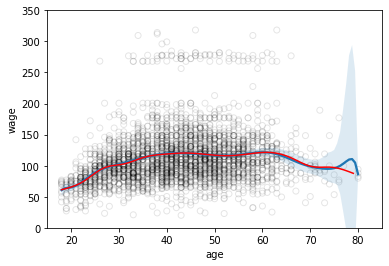

In [56]:
transformed_deg15 = dmatrix("cr(df.age, df=15)", {"df.age": df.age}, return_type='dataframe')
fit6 = sm.GLM(df.wage, transformed_deg15).fit()
pred6 = fit6.predict(dmatrix("cr(age_grid, df=15)", {"age_grid": age_grid}, return_type='dataframe'))

import warnings
warnings.filterwarnings('ignore')
plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
sns.regplot(df.age, df.wage, order = 15, scatter=False)
plt.plot(age_grid, pred6, color='r', label='Natural spline df=15')
plt.xlim(15,85)
plt.ylim(0,350)

## 7.8 实验:非线性建模
### 7.8.1 多项式回归和阶梯函数

In [18]:
X1 = PolynomialFeatures(1).fit_transform(df.age.values.reshape(-1,1))
X2 = PolynomialFeatures(2).fit_transform(df.age.values.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(df.age.values.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(df.age.values.reshape(-1,1))
X5 = PolynomialFeatures(5).fit_transform(df.age.values.reshape(-1,1))

In [19]:
fit = sm.GLS(df.wage, X4).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-184.1542,60.040,-3.067,0.002,-301.879,-66.430
x1,21.2455,5.887,3.609,0.000,9.703,32.788
x2,-0.5639,0.206,-2.736,0.006,-0.968,-0.160
x3,0.0068,0.003,2.221,0.026,0.001,0.013
x4,-3.204e-05,1.64e-05,-1.952,0.051,-6.42e-05,1.45e-07


In [20]:
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)
X_test = PolynomialFeatures(4).fit_transform(age_grid)
pred = fit.predict(X_test)

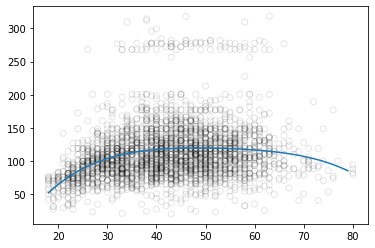

In [21]:
plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(age_grid, pred)

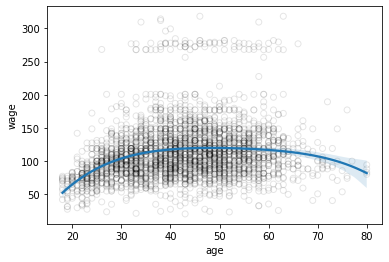

In [22]:
plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
sns.regplot(df.age, df.wage, order = 4, scatter=False)

In [23]:
fit_1 = fit = sm.GLS(df.wage, X1).fit()
fit_2 = fit = sm.GLS(df.wage, X2).fit()
fit_3 = fit = sm.GLS(df.wage, X3).fit()
fit_4 = fit = sm.GLS(df.wage, X4).fit()
fit_5 = fit = sm.GLS(df.wage, X5).fit()

sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


In [24]:
df_cut, bins = pd.cut(df.age, 4, retbins=True, right=True)
df_steps = pd.concat([df.age, df_cut, df.wage], keys=['age','age_cuts','wage'], axis=1)

df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])
df_steps_dummies = sm.add_constant(df_steps_dummies)

fit = sm.GLM(df_steps.wage, df_steps_dummies.drop(df_steps_dummies.columns[[1]], axis=1)).fit()
fit.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,94.1584,1.476,63.790,0.000,91.265,97.051
"(33.5, 49.0]",24.0535,1.829,13.148,0.000,20.468,27.639
"(49.0, 64.5]",23.6646,2.068,11.443,0.000,19.611,27.718
"(64.5, 80.0]",7.6406,4.987,1.532,0.126,-2.135,17.416
